<a href="https://colab.research.google.com/github/kkokay07/genomicclass/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Analysis

## Theory

### What is a Decision Tree?
A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. It creates a tree-like model where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents the final prediction.

### Key Components:
1. Root Node: The topmost node where the first split occurs
2. Decision Nodes: Internal nodes where the data is split based on feature values
3. Branches: Connections between nodes showing the decision path
4. Leaf Nodes: Terminal nodes that contain the final predictions

### Advantages:
- Easy to understand and interpret
- Requires minimal data preprocessing
- Can handle both numerical and categorical data
- Makes no assumptions about data distribution

### Disadvantages:
- Can create overly complex trees that overfit
- May be unstable (small data changes can result in very different trees)
- Can be biased if classes are imbalanced

## Practical Implementation

In [1]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

### Step 1: Data Upload and Loading
Upload your dataset and prepare it for analysis.

In [5]:
# Load the dataset
data = pd.read_csv('common_cancers.csv')

# Display basic information
print("\nDataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 646 entries, Individuals to HD2900012940
dtypes: int64(645), object(1)
memory usage: 1.3+ MB
None

First few rows:
   Individuals  HD0100001401  BFGL-NGS-62077  HD0100002373  HD0100010085  \
0  Lung_Cancer             1               1             1             1   
1  Lung_Cancer             1               2             1             1   
2  Lung_Cancer             1               2             1             1   
3  Lung_Cancer             1               1             1             1   
4  Lung_Cancer             1               1             1             1   

   HD0100012520  HD0100015487  HD0100015803  HD0100016678  HD0100016761  ...  \
0             1             1             3             3             3  ...   
1             1             1             3             3             3  ...   
2             1             1             3             3             3  ...   
3           

### Step 2: Data Preprocessing
Clean the data and prepare it for the model.

In [6]:
# Handle missing values
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encode categorical variables
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Separate features and target
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

### Step 3: Data Splitting
Split the data into training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 209 samples
Testing set size: 53 samples


### Step 4: Create and Train the Model
Initialize and train the Decision Tree classifier.

In [8]:
# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
dt_classifier.fit(X_train, y_train)
print("Model has been trained!")

Model has been trained!


### Step 5: Model Evaluation
Evaluate the model's performance.

Model Accuracy: 0.8302

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.17      0.20      0.18         5
           3       1.00      0.93      0.97        30

    accuracy                           0.83        53
   macro avg       0.65      0.66      0.65        53
weighted avg       0.85      0.83      0.84        53



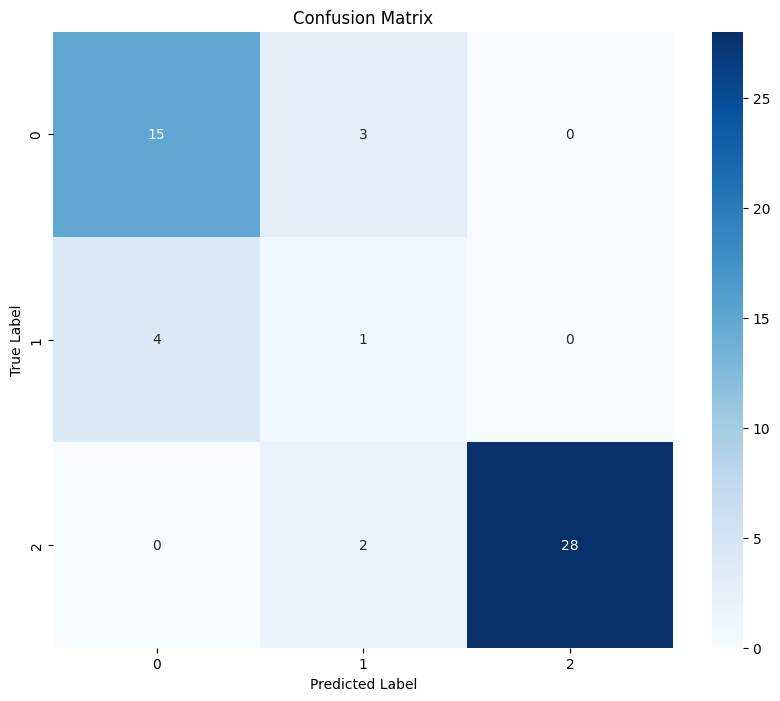

In [9]:
# Make predictions and evaluate
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Step 6: Feature Importance Analysis
Analyze which features are most important for predictions.

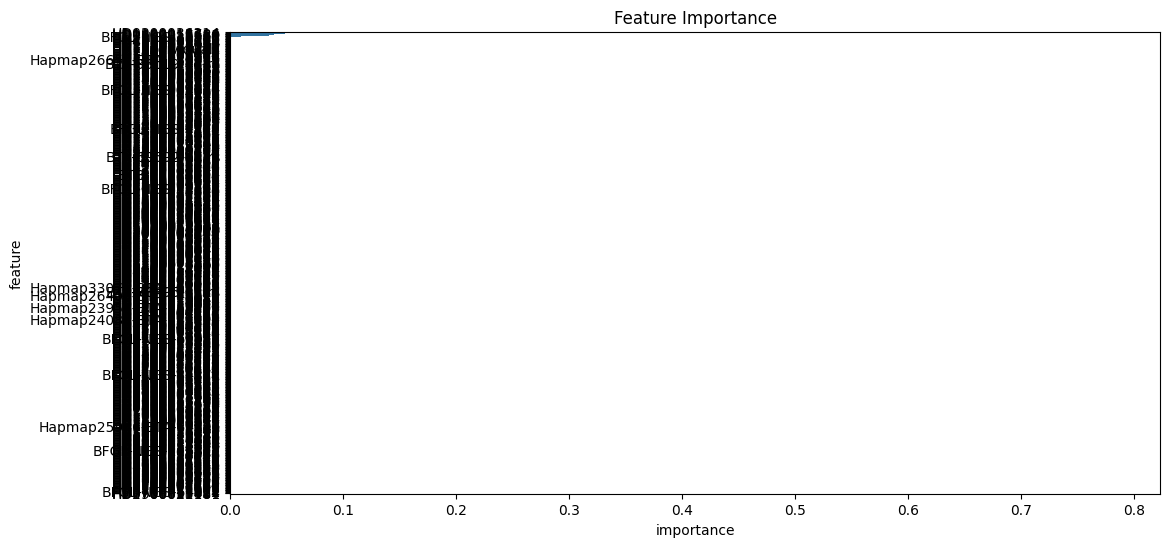

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Analyze and visualize feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Save results
feature_importance.to_csv('feature_importance.csv', index=False)
files.download('feature_importance.csv')

### Step 7: Tree Visualization
Visualize the actual decision tree structure.

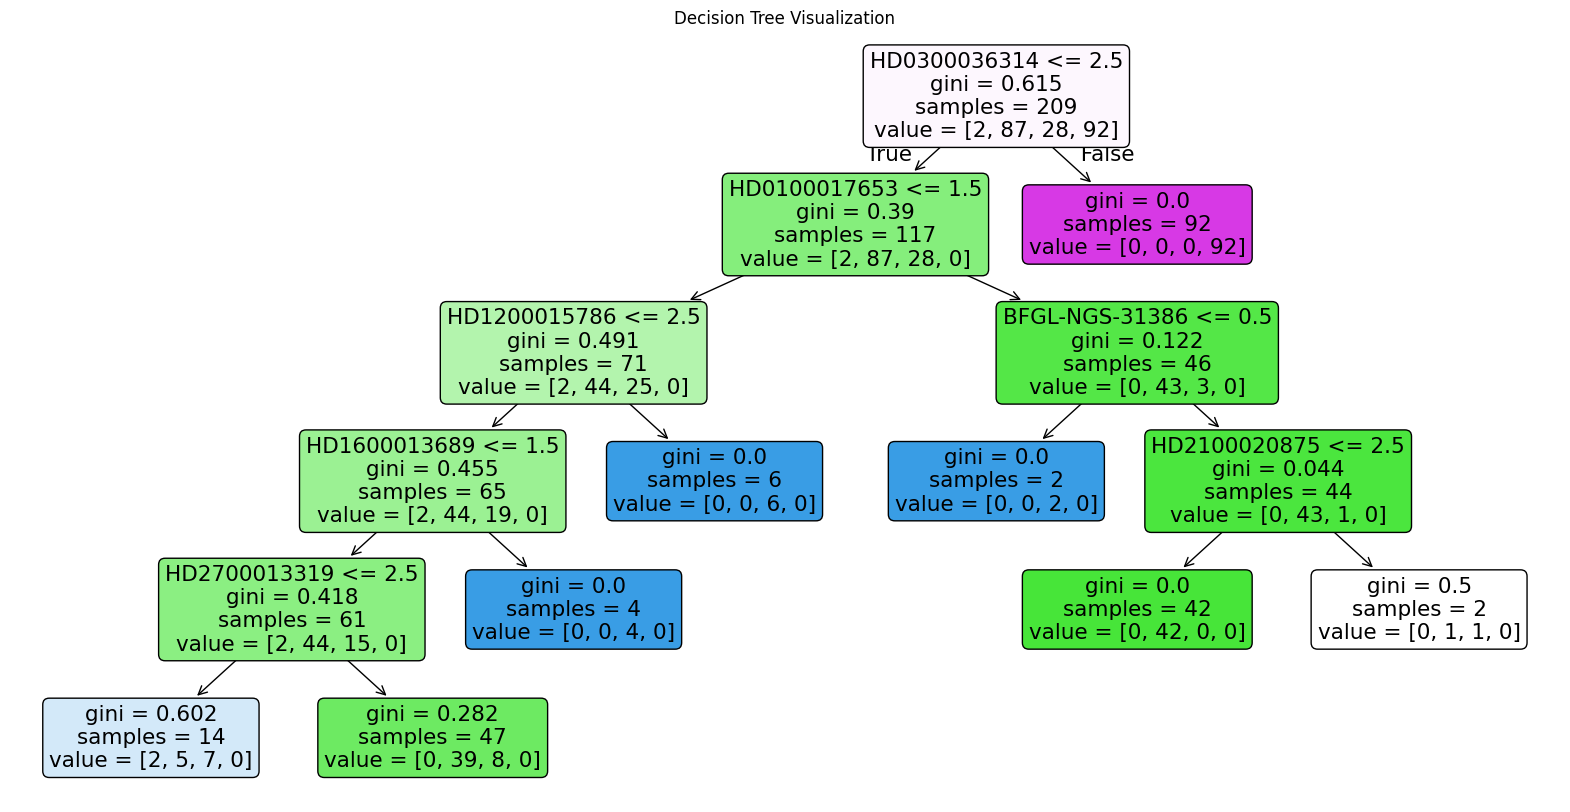

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()